In [1]:
cd ..

/Users/n.barsukov/PycharmProjects/toxic-comments-detector


In [2]:
import sys
import sklearn
import nltk

# local (this repo) imports
from dev import (
    load_cleaned_russian_text_data,
    evaluate_model,
    SEED
)


print('Python version:', sys.version)
print('Sklearn version:', sklearn.__version__)

Python version: 3.8.9 (default, Apr  3 2021, 01:50:09) 
[Clang 12.0.0 (clang-1200.0.32.29)]
Sklearn version: 0.24.1


# Word Vectorizer

In [3]:
X_train, X_test, y_train, y_test = load_cleaned_russian_text_data()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# nltk.download('stopwords')

vectorizer = CountVectorizer(
    min_df=3,
    stop_words=stopwords.words('russian')
)

vectorizer.fit(X_train.flatten());

In [5]:
X_train = vectorizer.transform(X_train.flatten())

X_test = vectorizer.transform(X_test.flatten())

# Build Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train);

# Model evaluation

Accuracy: 86.75%
Recall: 71.38%
Precision: 86.2%
F1-score: 78.1% 



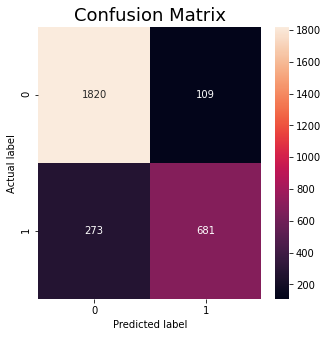

In [7]:
y_test_pred = (model.predict(X_test).flatten() > 0.5) * 1

evaluate_model(y_test, y_test_pred)